In [1]:
!pip install scikit-learn-intelex

In [2]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# math related operations
import numpy as np
import pandas as pd

# machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random

# to open, load, convert array to image
from PIL import Image

# to preprocess the image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Since it is multiclass classification, one hot encoding is needed
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# for augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# MobileNetV3 model
from tensorflow.keras.applications import mobilenet_v3
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [4]:
# loading directory
bcc_dir='/kaggle/input/isic-2019-skin-lesion-images-for-classification/BCC/'
mel_dir='/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/'
nv_dir='/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/'

# storing all the images from directories 
bcc_images=os.listdir(bcc_dir)
mel_images=os.listdir(mel_dir)
nv_images=os.listdir(nv_dir)

**Checking sample images**

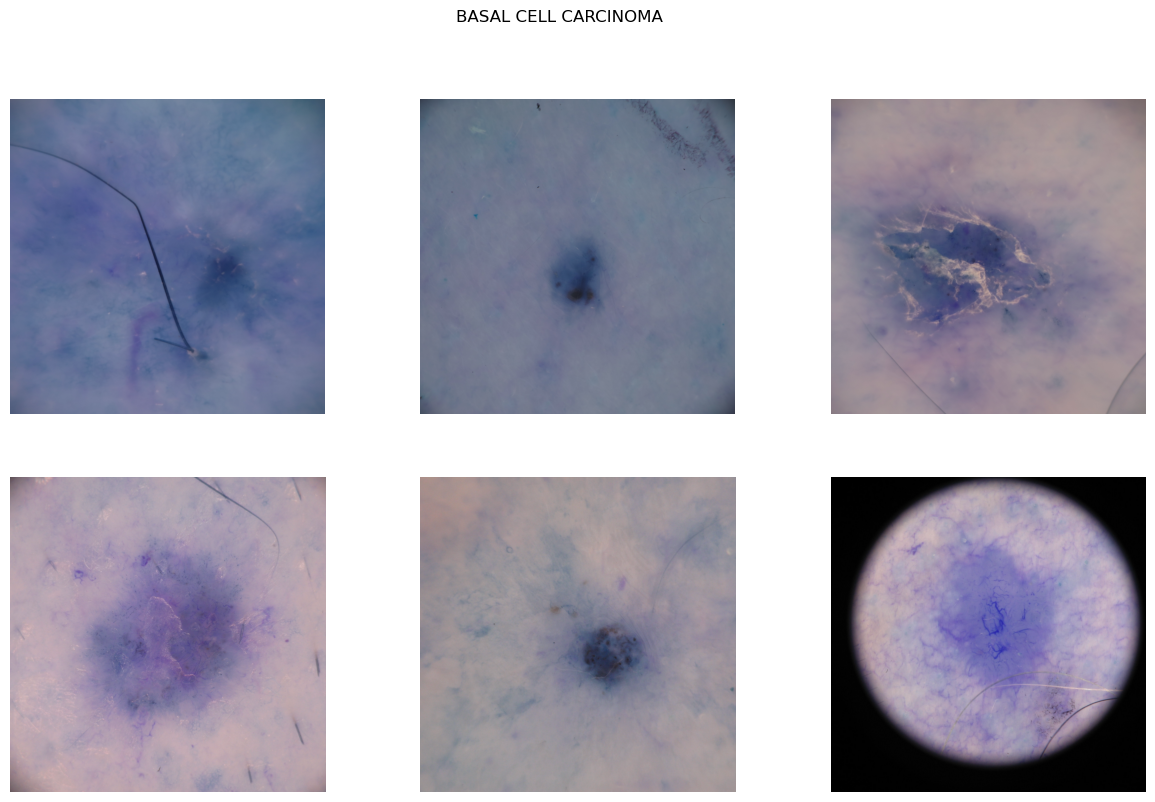

In [5]:
sample_parasite=random.sample(bcc_images, 6)
f, ax=plt.subplots(2, 3, figsize=(15, 9)) # 2 rows 3 columns of subplot

for i in range(0, 6):
    im=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/BCC/' + sample_parasite[i])
    ax[i//3, i%3].imshow(im)
    ax[i//3, i%3].axis('off')
f.suptitle('BASAL CELL CARCINOMA') # secondary description or explanation
plt.show()

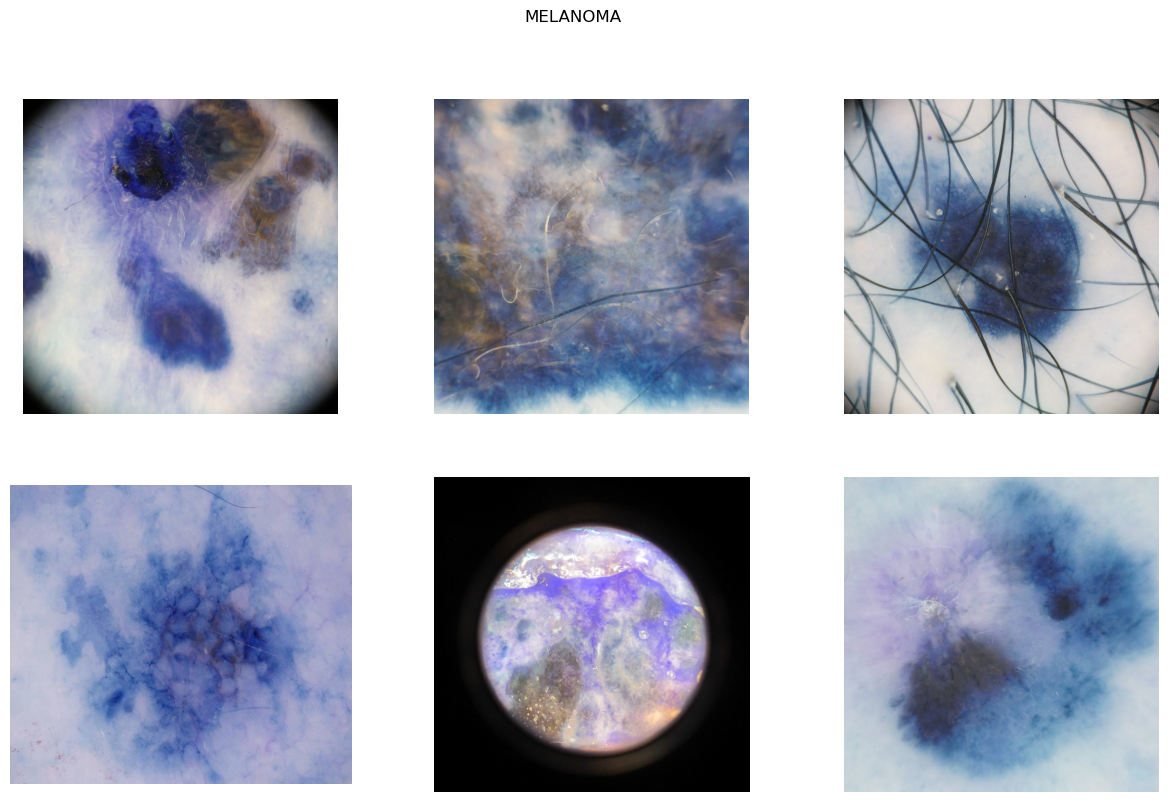

In [6]:
sample_parasite=random.sample(mel_images, 6)
f, ax=plt.subplots(2, 3, figsize=(15, 9)) # 2 rows 3 columns of subplot

for i in range(0, 6):
    im=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/' + sample_parasite[i])
    ax[i//3, i%3].imshow(im)
    ax[i//3, i%3].axis('off')
f.suptitle('MELANOMA') # secondary description or explanation
plt.show()

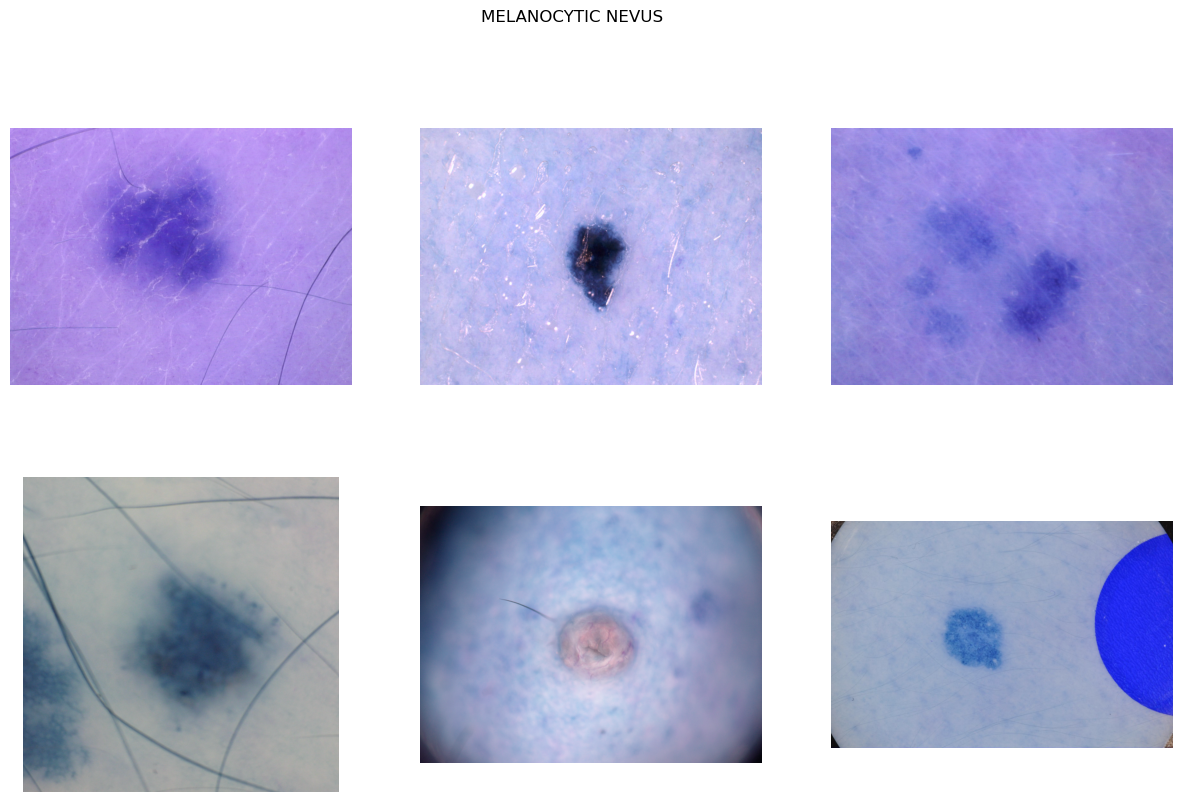

In [7]:
sample_parasite=random.sample(nv_images, 6)
f, ax=plt.subplots(2, 3, figsize=(15, 9)) # 2 rows 3 columns of subplot

for i in range(0, 6):
    im=cv2.imread('/kaggle/input/isic-2019-skin-lesion-images-for-classification/NV/' + sample_parasite[i])
    ax[i//3, i%3].imshow(im)
    ax[i//3, i%3].axis('off')
f.suptitle('MELANOCYTIC NEVUS') # secondary description or explanation
plt.show()